In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import random
RS = 2020
random.seed(RS)
np.random.seed(RS)

In [4]:
# Check how to import another script. 
from kmeans import KMeans

# Check if it works. 
cl = KMeans(4)
print(cl.n_clusters)

4


In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
print(X.shape)
X[:10]

(200, 2)


/Users/kei/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


array([[ 2.23421043,  1.6934952 ],
       [-1.05510724,  2.6380308 ],
       [ 1.08272576,  4.06271877],
       [-2.60159431,  7.22195591],
       [ 1.60841463,  0.40180054],
       [ 0.98257009,  5.37530962],
       [-1.71343572,  2.97632236],
       [ 0.44359863,  3.11530945],
       [ 1.71444449,  5.02521524],
       [ 1.41372442,  4.38117707]])

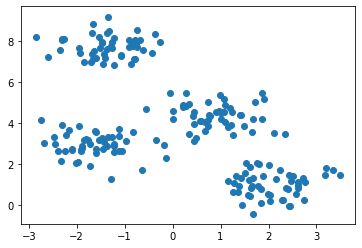

In [6]:
# Check what the data looks like. 
plt.scatter(X[:,0], X[:,1])

In [7]:
cluster_assignments[:10]

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0])

Text(0.5, 1.0, 'labels')

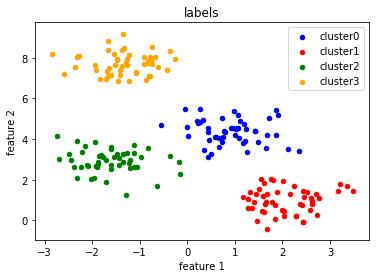

In [8]:
# Check the labels. 

merged_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(cluster_assignments)], axis=1)
merged_data.columns = ['feature1','feature2','cluster']

colors = ['blue','red','green','orange']
ax = None
for i, data in merged_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('labels')

In [9]:
# Implement k-means clustering. 

kmeans = KMeans(4)

In [10]:
# Create clusters. 
y_pred, centroids = kmeans.fit(X)
y_pred[:10]

Iteration  0, inertia 1401.441
center shift 8.880164
Iteration  1, inertia 489.173
center shift 0.907258
Iteration  2, inertia 394.701
center shift 2.235583
Iteration  3, inertia 195.765
center shift 0.986900
Iteration  4, inertia 136.368
center shift 0.019506
Iteration  5, inertia 135.392
center shift 0.000000
Converged at iteration 5: center shift 0.000000


[3, 2, 0, 1, 3, 0, 2, 0, 0, 0]

In [11]:
centroids

[[0.9079396154722766, 4.3571379124853165],
 [-1.348427149431572, 7.720965481677157],
 [-1.624014149548755, 2.915962902631502],
 [2.071878923404346, 0.9742292639681068]]

Text(0.5, 1.0, 'predicted clusters')

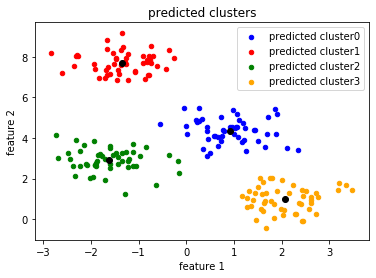

In [12]:
# Evaluate the model. 

merged_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merged_data.columns = ['feature1','feature2','predicted cluster']

colors = ['blue','red','green','orange']
ax = None
for i, data in merged_data.groupby('predicted cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', 
                                           color=colors[i], label=f'predicted cluster{i}', ax=ax)

# Convert 
x = []
y = []
for centroid in centroids:
    x.append(centroid[0])
    y.append(centroid[1])
    
# Plot the centroids.
plt.scatter(x, y, color='black')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('predicted clusters')

In [13]:
# V measure
from sklearn.metrics.cluster import v_measure_score

v_measure_score(cluster_assignments, y_pred)

1.0

• The hypotheses are correct.  

In [14]:
# Save the output. 
file1 = open("output/output.txt","w") # "w": write mode 
file1.write("predicted clusters: \n") 
file1.write(str(y_pred) + "\n")
file1.write("centroids: \n") 
file1.write(str(centroids) + "\n")
file1.close() 

In [15]:
#############
# Extend k-Means 

# Check if things work. 
cl2 = KMeans(k=6)
cl2.n_clusters

6

In [16]:
# Predict. (balanced=False)
y_pred, centroids = cl2.fit_extended(X, False)

Iteration  0, inertia 457.138
center shift 2.385234
Iteration  1, inertia 247.587
center shift 1.494853
Iteration  2, inertia 136.015
center shift 0.346412
Iteration  3, inertia 115.254
center shift 0.026614
Iteration  4, inertia 113.809
center shift 0.022977
Iteration  5, inertia 113.245
center shift 0.011732
Iteration  6, inertia 112.978
center shift 0.001944
Iteration  7, inertia 112.940
center shift 0.000000
Converged at iteration 7: center shift 0.000000


0    31
1    16
2    19
3    34
4    50
5    50
Name: cluster, dtype: int64


Text(0, 0.5, 'num of instances')

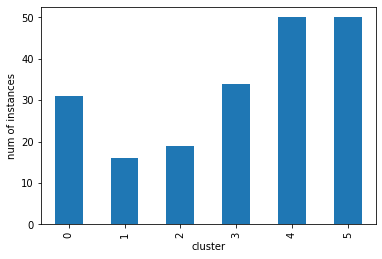

In [17]:
# Count the number of memebers in each cluster. 
labels = pd.Series(y_pred, name='cluster')
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster')
ax.set_ylabel('num of instances')

In [18]:
# Predict. (balanced=True)
y_pred, centroids = cl2.fit_extended(X, True)

Iteration  0, inertia 0.000
center shift 11.844341
Iteration  1, inertia 0.000
center shift 0.381295
Iteration  2, inertia 0.000
center shift 0.511988
Iteration  3, inertia 0.000
center shift 0.381031
Iteration  4, inertia 0.000
center shift 0.056740
Iteration  5, inertia 0.000
center shift 0.001385
Iteration  6, inertia 0.000
center shift 0.000856
Iteration  7, inertia 0.000
center shift 0.017053
Iteration  8, inertia 0.000
center shift 0.000000
Converged at iteration 8: center shift 0.000000


0    34
1    34
2    33
3    33
4    33
5    33
Name: cluster, dtype: int64


Text(0, 0.5, 'num of instances')

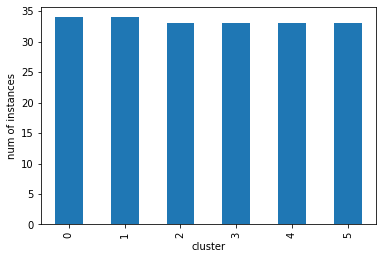

In [19]:
# Count the number of memebers in each cluster. 
labels = pd.Series(y_pred, name='cluster')
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster')
ax.set_ylabel('num of instances')

In [20]:
# Save the output. 
file1 = open("output/extended_output.txt","w") # "w": write mode 
file1.write("predicted clusters: \n") 
file1.write(str(y_pred) + "\n")
file1.write("centroids: \n") 
file1.write(str(centroids) + "\n")
file1.close() 